Import of libraries and global parameters

In [40]:
import numpy as np
import matplotlib.pyplot as plt

u = 1.0             # Advection velocity
L = 1.0             # Domain length
T = 0.5             # Final time
C = 0.5             # Courant number (0 < C < 1)

Functions for the upwind scheme

In [41]:
def initial_condition(x):
    return np.sin(2 * np.pi * x)

def analytical_solution(x, t):
    return np.sin(2 * np.pi * (x - u * t))

def upwind(dx):
    dt = C * dx / u
    x = np.arange(0, L, dx)
    nt = int(T / dt)

    phi = initial_condition(x)

    for n in range(nt):
        phi[1:] = phi[1:] - C * (phi[1:] - phi[:-1])
        phi[0] = phi[0] - C * (phi[0] - phi[-1])  # Periodic BC
    phi_exact = analytical_solution(x, T)

    rmse = np.sqrt(np.mean((phi - phi_exact)**2))
    return rmse

Calculate and plot the solution

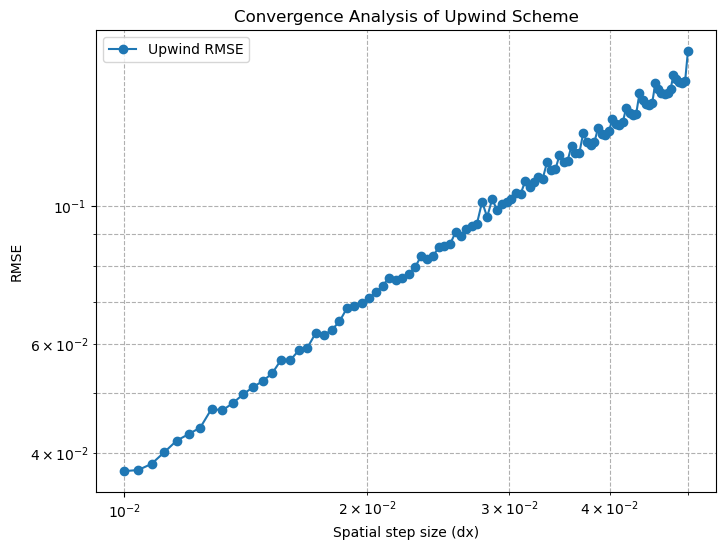

Estimated order of accuracy: 0.93


In [43]:
dx_values = np.linspace(0.01, 0.05, 100)
errors = []

for dx in dx_values:
    rmse = upwind(dx)
    errors.append(rmse)

plt.figure(figsize=(8, 6))
plt.loglog(dx_values, errors, 'o-', label='Upwind RMSE')
plt.xlabel('Spatial step size (dx)')
plt.ylabel('RMSE')
plt.title('Convergence Analysis of Upwind Scheme')
plt.grid(True, which="both", ls="--")
plt.legend()

# Compute convergence rate
p = np.polyfit(np.log(dx_values), np.log(errors), 1)
plt.show()

print(f"Estimated order of accuracy: {p[0]:.2f}")